In [51]:
# Liabriares used to read dataset and for visualization part as well
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier # RF model classifier 
from sklearn.model_selection import GridSearchCV # used for improve the eaach model performance
from sklearn.preprocessing import StandardScaler # need to do scaling before workign with the modelling
from sklearn.neighbors import KNeighborsClassifier # KNN to find k neighbors
from sklearn.feature_selection import SelectKBest, chi2 # used for KNN algorithm to get selected features 
from sklearn.decomposition import PCA # visualization part
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder # label encoder used for changing the data types
from sklearn.model_selection import train_test_split # to split the datset 80% and 20$ ratio
import xgboost as xgb # xgb model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # used for model evaluation part
import joblib # to dump the model and feature files

## Loading Dataset

In [2]:
#reading dataset
shoppers_df = pd.read_csv("dataset/online_shoppers_intention.csv")
shoppers_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### To sump up the dataset information

The dataset contains <strong>12,330 online shopping sessions</strong> collected from an e-commerce website. It includes <strong>18 attributes</strong>, out of which 10 are numerical such as time spent on pages, number of pages visited, exit rates and 8 are categorical such as month, visitor type, region, operating system. The main goal of this dataset is to predict whether a user will make a purchase, which is represented by the <strong>“Revenue”</strong> column. Revenue is a True and False value, so it becomes our class label for a classification task.



## Exploratory Data Analysis


In [4]:
# showing basic data information like number of rows, columns, data types and non-null counts
shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# checking first 5 rows of the datset to undertand how values look
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# getting statistical overview with help of mean, std, min, max, quartlies for all numerical features
shoppers_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# to see most frequent categories and number of unique values
shoppers_df.describe(include="object")

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [8]:
# checking label destribution like Revenue boolean columns
shoppers_df.describe(include="bool")

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


In [9]:
# checking missed values to make sure for data cleaning
shoppers_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# indentifying the number of unique values
shoppers_df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [11]:
# checking data types by grouping
shoppers_df.select_dtypes(include=['float64','int64']).columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [12]:
shoppers_df.select_dtypes(include=['object']).columns

Index(['Month', 'VisitorType'], dtype='object')

In [13]:
shoppers_df.select_dtypes(include=['bool']).columns

Index(['Weekend', 'Revenue'], dtype='object')

In [14]:
# checking the Revenue balance which we will use it later for classification
shoppers_df["Revenue"].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

#### Correlation Matrix


In [15]:
# showing linear relationship between numeric features
corr_shoppers = shoppers_df.corr(numeric_only=True)
corr_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


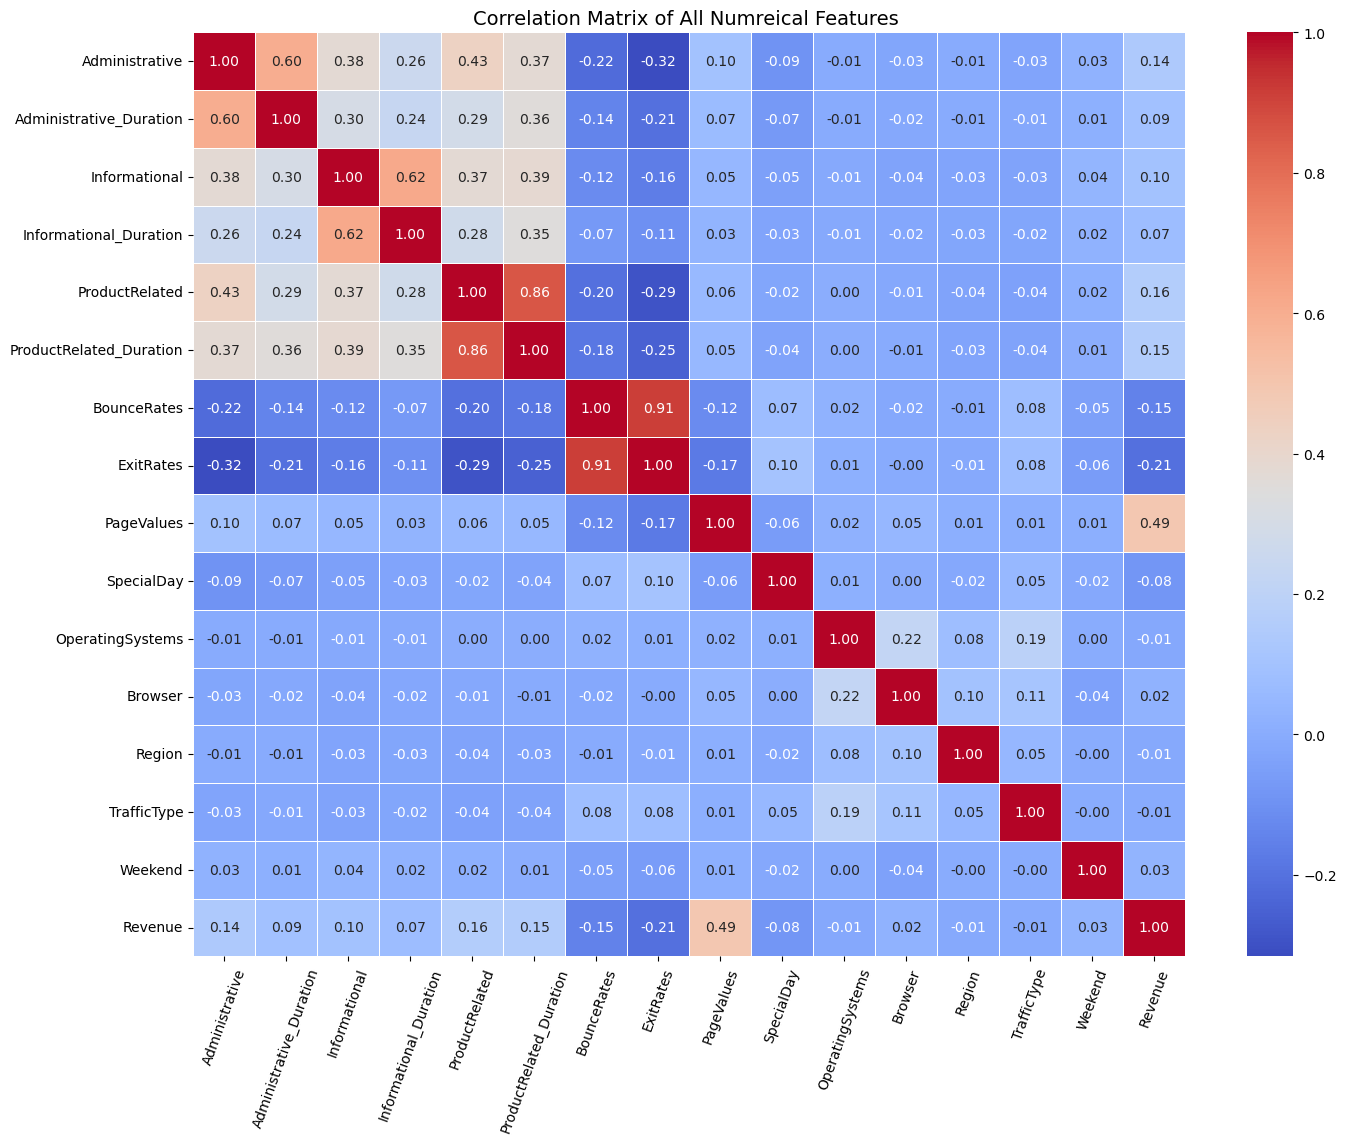

In [16]:
# To visualize
plt.figure(figsize=(16,12))
sns.heatmap(corr_shoppers, annot=True, cmap="coolwarm", fmt=".2f",  linewidths=0.5, cbar=True)
plt.title("Correlation Matrix of All Numreical Features ", fontsize=14)
plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.savefig("source/plots_graphs/Correlation_Matrix_of_All_Numerical_Features_for_Shoppers.png")
plt.show()

The correlation matrix helped identify how numerical features relate to each other and to the target variable. ProductRelated has a strong positive correlation with ProductRelated_Duration around 0.86, which makes sense because spending more time on product pages usually means more of them were visited. BounceRates and ExitRates show a very strong positive correlation around 0.91, since they both capture exit behavior from the website. The most important correlation for prediction is between PageValues and Revenue, which is approximately 0.49, indicating that PageValue is one of the strongest indicators of purchase intention. Other features such as ProductRelated, ProductRelated_Duration, and Administrative also show weaker positive correlations with Revenue, while BounceRates and ExitRates both have moderate negative correlations, meaning sessions with higher bounce or exit behavior are less likely to produce revenue.

### Graphs and Plots

<b>Class Imbalance Plot</b>
This graph helps me check whether the dataset has balanced or imbalanced classes for the target variable <strong>Revenue</strong>.
If one class True is much smaller than the other False, the machine learning models may become biased.
Understanding imbalance early is important because I may need oversampling, undersampling, or class-weight adjustments later.

Reference: https://towardsdatascience.com/10-amazing-machine-learning-visualizations-you-should-know-in-2023-528282940582/


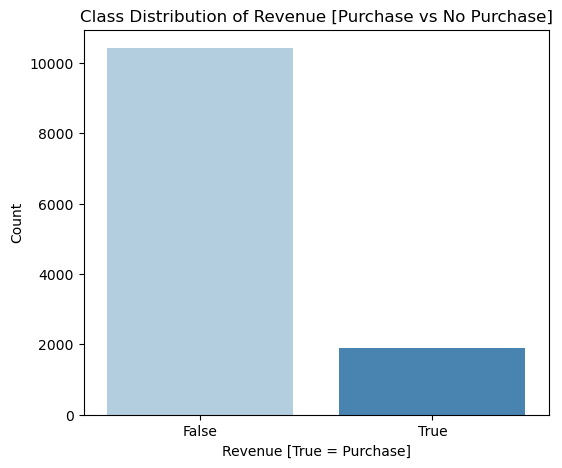

In [17]:
plt.figure(figsize=(6,5))
# assigned hue to x and  disabled legend
sns.countplot(x=shoppers_df["Revenue"], hue=shoppers_df["Revenue"], palette="Blues", legend=False)
plt.title("Class Distribution of Revenue [Purchase vs No Purchase]")
plt.xlabel("Revenue [True = Purchase]")
plt.ylabel("Count")
plt.savefig("source/plots_graphs/Distribution_of_Revenue_to_see_Imbalanced_classess.png")
plt.show()

<b>Feature Importance Plot</b>
```
This plot helps me identify which numerical features contribute most to predicting the target variable, even before building the final model.
Since the dataset contains many behavior-based variables like page durations, bounce rates, this graph highlights which behaviors matter most for predicting purchase intention.
```

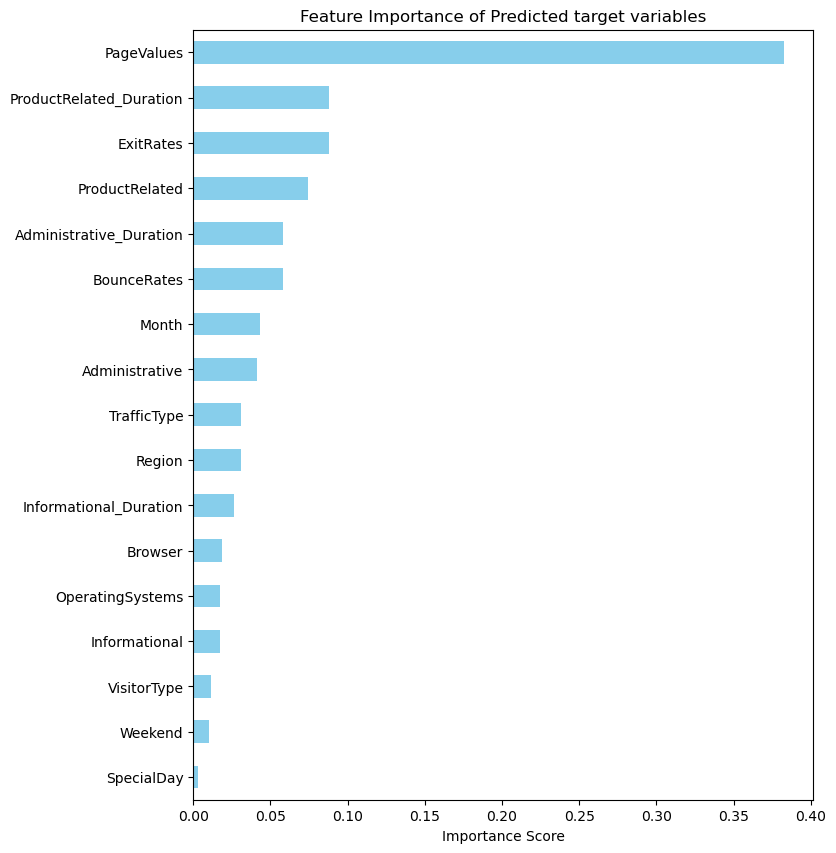

In [18]:
# converting  categorical columns to numeric for using Random Forest
df_encoded = shoppers_df.copy()
df_encoded["Month"] = df_encoded["Month"].astype("category").cat.codes
df_encoded["VisitorType"] = df_encoded["VisitorType"].astype("category").cat.codes

X = df_encoded.drop("Revenue", axis=1)
y = df_encoded["Revenue"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(8,10))
importances.plot(kind="barh", color="skyblue")
plt.title("Feature Importance of Predicted target variables")
plt.xlabel("Importance Score")
plt.savefig("source/plots_graphs/Feature_Importance_for_Predicting_Purchase_Intention.png")
plt.show()

<b>Principal Component Plot</b>
```
PCA  allows me to reduce many features into two main components, so I can visually inspect whether shoppers who generate revenue behave differently from those who don’t.
Even though PCA won’t be used in modeling, it helps me understand the overall structure of the data and whether the classes are naturally separable.
```

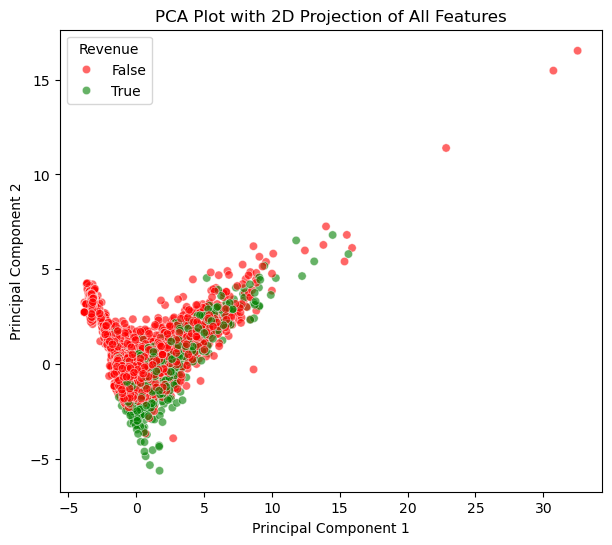

In [19]:
df_pca = df_encoded.copy()

X_scaled = StandardScaler().fit_transform(df_pca.drop("Revenue", axis=1))
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df_pca["Revenue"], palette=["red","green"], alpha=0.6)

plt.title("PCA Plot with 2D Projection of All Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("source/plots_graphs/PCA_Plot_Inspect_shoppers_revenue_behave_from_others.png")
plt.show()

<b>Frequency Distribustion</b>
```
To better understand how each attribute behaves, I plotted the frequency distribution for every column in the dataset. It helps me to understand, how values are spread, which features have many repeated values or large ranges, early signs of outlires or unusual patters, and how categorical and numerical features appear visually. Histograms provides smiple and clear way to view distribution patters for each features
```

Refernce: https://www.w3schools.com/tags/ref_colornames.asp

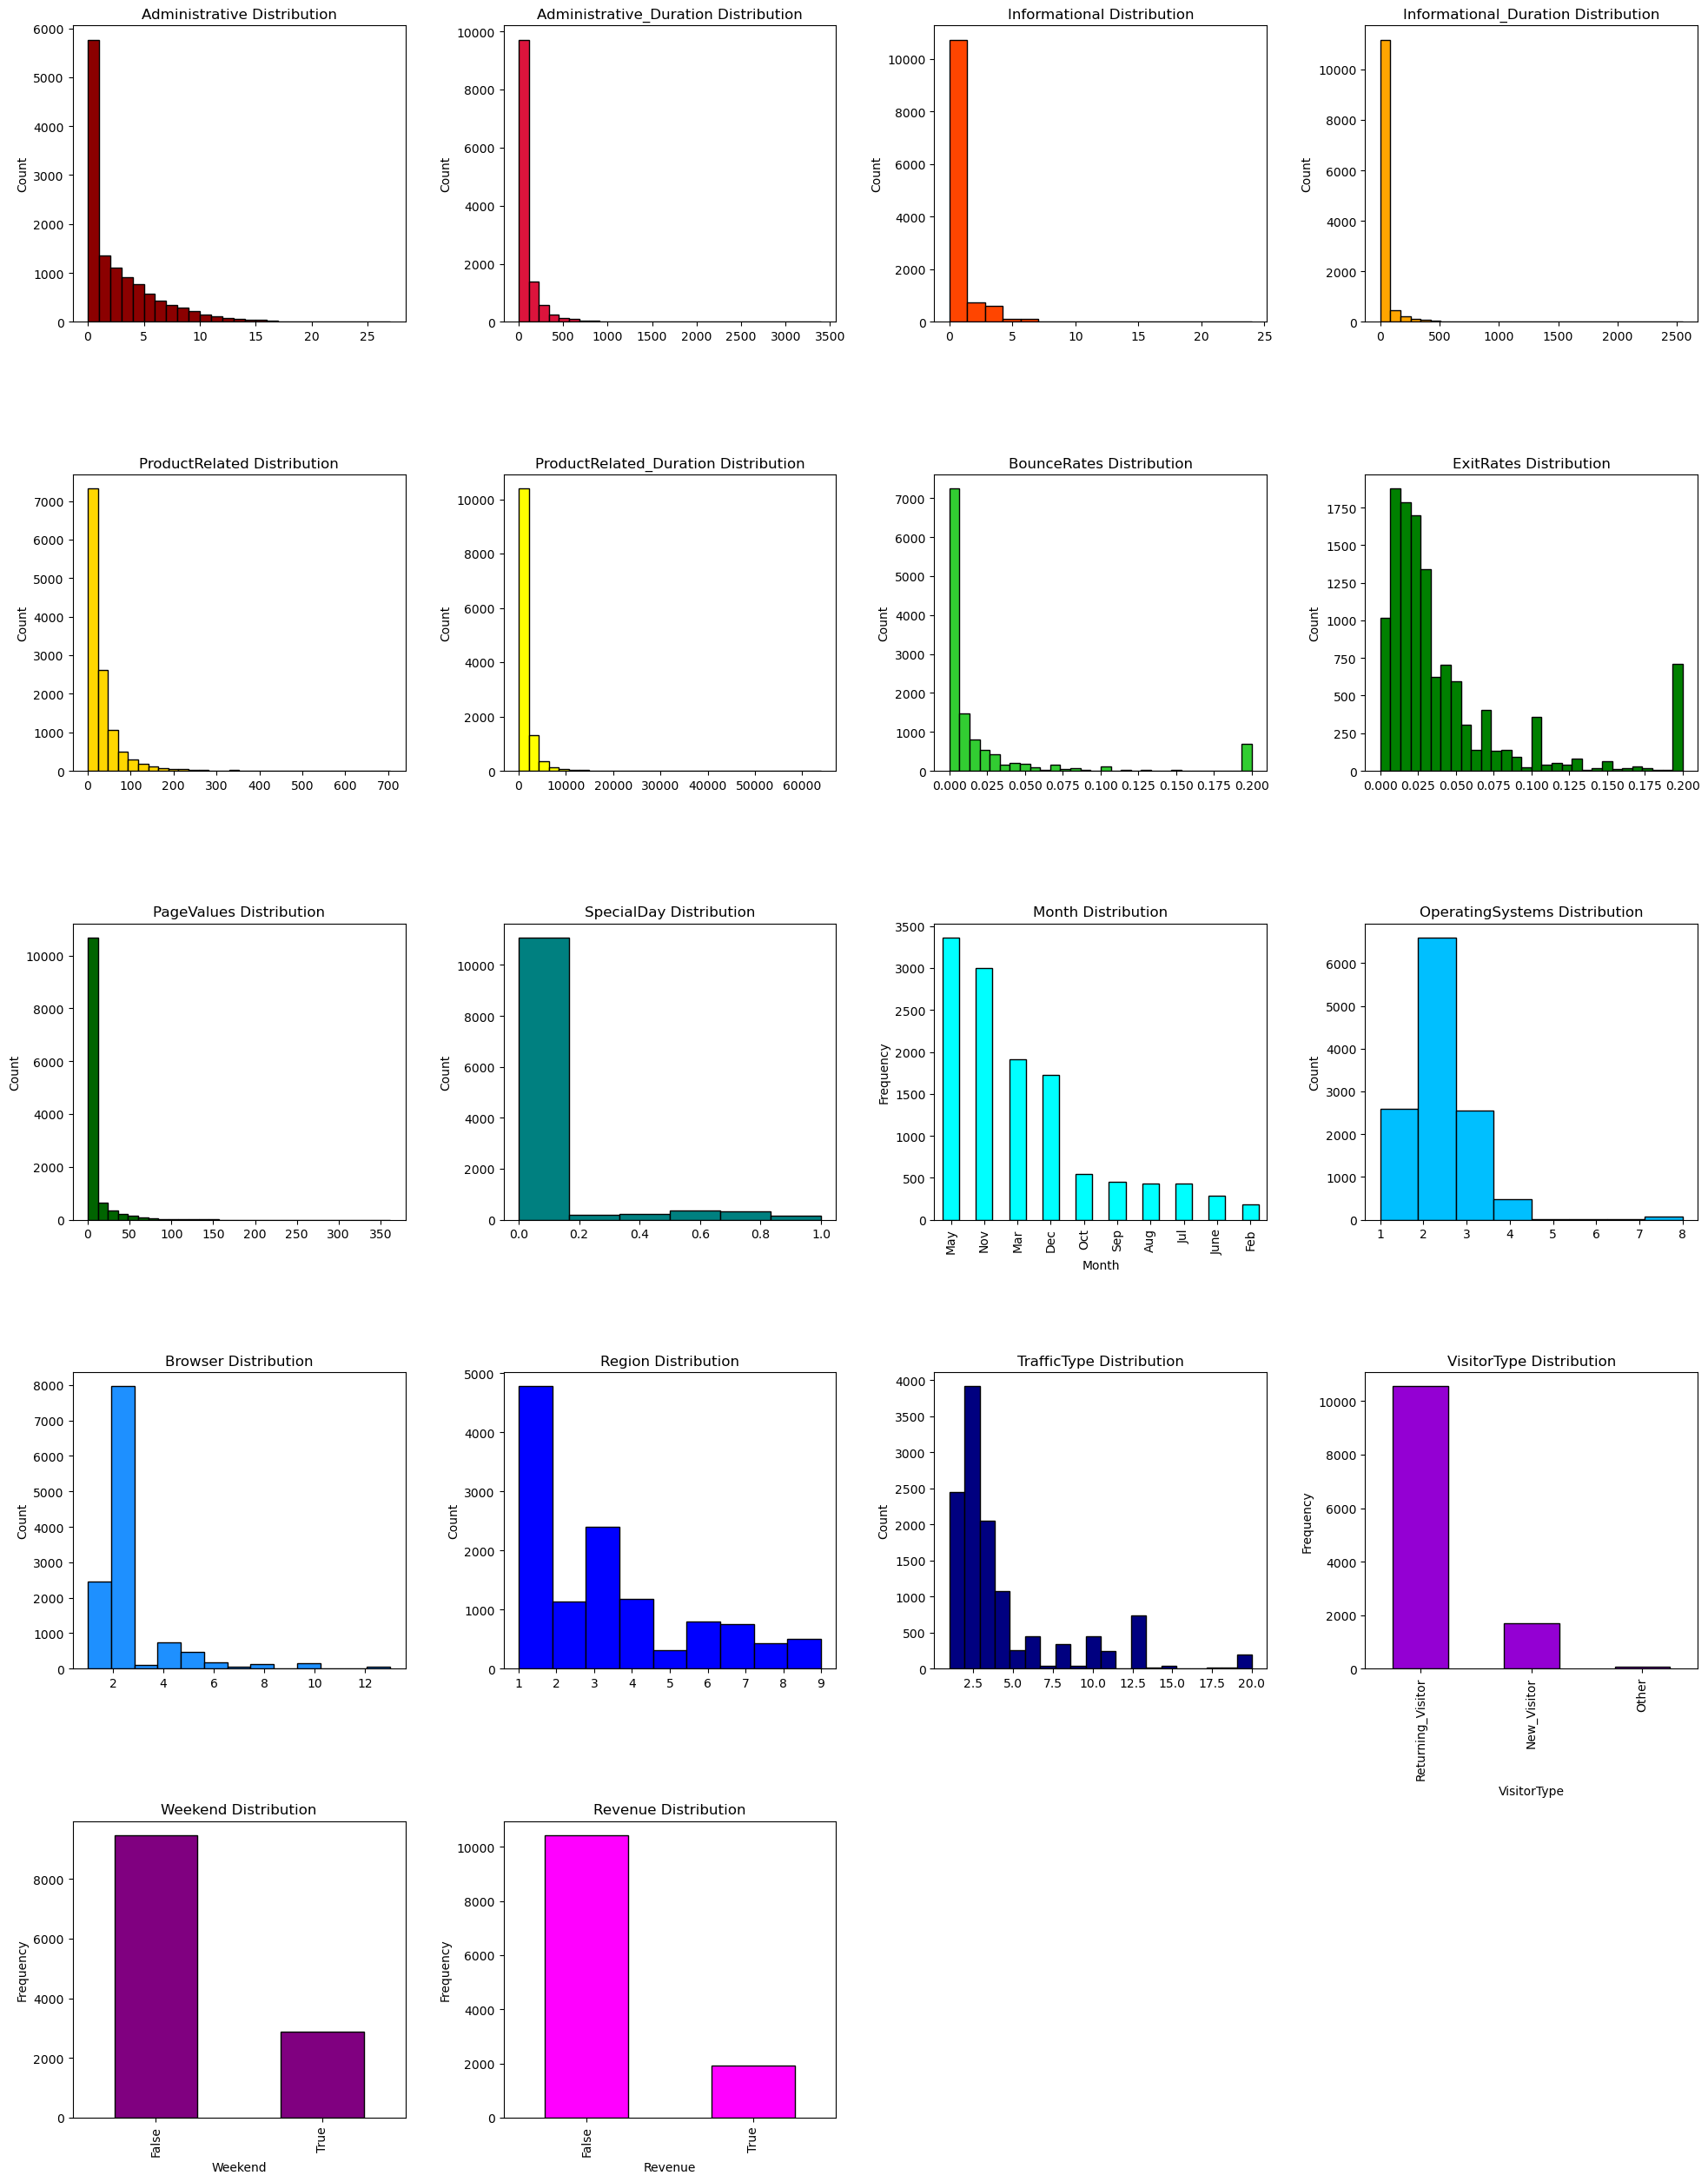

In [20]:
# creating histogram plots for all columns and it helps visually understand how each attribute is distributed.
colors = [
    "darkred", "crimson", "orangered", "orange", "gold", "yellow",
    "limegreen","green","darkgreen","teal","cyan","deepskyblue","dodgerblue","blue",
    "navy","darkviolet","purple","magenta","deeppink"
]

num_cols = len(shoppers_df.columns)
rows = 6
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
axes = axes.flatten()

for idx, col in enumerate(shoppers_df.columns):
    data = shoppers_df[col]

    # To check If a column is categorical like object bool, show bar plot instead
    if data.dtype == "object" or data.dtype == "bool":
        shoppers_df[col].value_counts().plot(kind="bar", ax=axes[idx], color=colors[idx % len(colors)], edgecolor="black")
        axes[idx].set_ylabel("Frequency")
    else:
        # For Numerical columns show histogram
        bins = min(30, shoppers_df[col].nunique())  # limited number of bins
        axes[idx].hist(data, bins=bins, color=colors[idx % len(colors)], edgecolor="black")
        axes[idx].set_ylabel("Count")

    axes[idx].set_title(f"{col} Distribution")

# it will hides empty plots if there is any of them
for ax in axes[num_cols:]:
    ax.set_visible(False)

plt.tight_layout(pad=2.0)
plt.savefig("source/plots_graphs/Visualaysing_all_columns_in_dataset.png")
plt.show()

## Data Preparation

In [21]:
# Checking missing values in every column
shoppers_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [22]:
# To Check for negative values in duration and count columns
numeric_cols = shoppers_df.select_dtypes(include=["float64", "int64"]).columns
(shoppers_df[numeric_cols] < 0).sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

In [23]:
# Checking unique values in important categorical columns
print("VisitorType:", shoppers_df["VisitorType"].unique())
print("Month:", shoppers_df["Month"].unique())
print("Weekend:", shoppers_df["Weekend"].unique())
print("Revenue:", shoppers_df["Revenue"].unique())

VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']
Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Weekend: [False  True]
Revenue: [False  True]


In [24]:
# Detecting outliers using IQR
outlier_summary = {}

for col in numeric_cols:
    Q1 = shoppers_df[col].quantile(0.25)
    Q3 = shoppers_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count_outliers = shoppers_df[(shoppers_df[col] < lower) | (shoppers_df[col] > upper)].shape[0]
    outlier_summary[col] = count_outliers

outlier_summary

{'Administrative': 404,
 'Administrative_Duration': 1172,
 'Informational': 2631,
 'Informational_Duration': 2405,
 'ProductRelated': 987,
 'ProductRelated_Duration': 961,
 'BounceRates': 1551,
 'ExitRates': 1099,
 'PageValues': 2730,
 'SpecialDay': 1251,
 'OperatingSystems': 111,
 'Browser': 4369,
 'Region': 511,
 'TrafficType': 2101}

These outliers make sense because time spent on pages varies a lot between users.
Since these values represent real user behavior, I kept the outliers instead of removing them to avoid losing important information.

In [25]:
# Copy original dataset
df = shoppers_df.copy()

# Convert boolean columns to integers
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)   # TARGET VARIABLE

# One-hot encode Month and VisitorType
df = pd.get_dummies(df, columns=["Month", "VisitorType"], drop_first=True)
# making sure all bool values become integer
df = df.astype({col: int for col in df.columns if df[col].dtypes == 'bool'})

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [26]:
# checking data types
df.dtypes

Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
Month_Dec                          int64
Month_Feb                          int64
Month_Jul                          int64
Month_June                         int64
Month_Mar                          int64
Month_May                          int64
Month_Nov                          int64
Month_Oct                          int64
Month_Sep       

Machine learning models cannot understand text values like <strong>Feb</strong> or <strong>Returning_Visitor</strong>. So I converted all categorical attributes into numerical form. I used Label Encoding for binary categories and One-Hot Encoding for multi-class categories.
~~~
Weekend > False:0, True:1
Revenue > False:0, True:1
Month & VisitorType become multiple dummy columns
~~~
Encoding increased the total number of columns, but now the dataset is completely numeric and ready for modeling.
This allows algorithms like Logistic Regression, KNN, and Tree Models to work correctly.

Models like KNN and Logistic Regression are sensitive to scale, so I applied Standard Scaling.

Tree-based models Random Forest, XGBoost do not require scaling, but using the scaled dataset helps maintain consistency.

Reference: https://medium.com/@post.gourang/feature-scaling-in-machine-learning-which-popular-algorithms-require-it-and-which-dont-a71f5585d664

In [27]:
y = df["Revenue"]          # target
X = df.drop("Revenue", axis=1)   # features only
# List of numeric columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
scaled_df = pd.concat([X, y], axis=1)
scaled_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0


#### Dataset splitting for training and testing

In [28]:
# Separate features and target
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

# Splitting the dataset into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [29]:
# shapes of splitted dataset
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}\n")

X_train shape: (9864, 26), X_test shape: (2466, 26)

y_train shape: (9864,), y_test shape: (2466,)



## Model Training

As discussed in the data preparation section, most numerical features in this dataset already lie on relatively similar scales, and the categorical variables were encoded in a straightforward way. Because of this, only minimal feature scaling was applied, and scaling becomes important mainly for distance-based models. During model selection, I considered how different types of algorithms react to scaling and how well they work with mixed (numerical + categorical) data.
<ul>
    <li>
        Tree-based models such as <b>Random Forest</b> and <b>XGBoost</b> naturally handle variations in feature scale and do not require normalization. They also capture complex non-linear relationships and automatically measure feature importance. This makes them very suitable for this dataset, where user-behavior patterns session duration, page types, bounce rate, special day effects interact in non-linear ways. Because tree-based models do not require strict assumptions and are robust to outliers, they were chosen as the primary models.
    </li>
    <li>
        Initially, I considered using <b>Logistics regression</b> or other linear embedded methods for feature selection, but these methods require standardized data and are less effective when the true relationships are non-linear. Instead, I chose tree-based embedded feature selection, such as feature importance values from Random Forest and XGBoost. These approaches do not require scaling and work well with this type of behavioral dataset. Therefore, tree-based embedded methods were used for both feature selection and model training.
    </li>
    <li>
        Since the task is a binary classification problem predicting whether a session ends in a purchase, the appropriate evaluation metrics are <b>Accuracy</b>, <b>Precision</b>, <b>Recall</b>, and <b>F1-score</b>, with macro averaging used to treat both classes equally because the data is imbalanced. These metrics allow a fair comparison between models and help identify the best-performing classifier in terms of both correctness and sensitivity to minority class predictions.
    </li>
    <li>
        each model requires its own hyperparameters to be optimized. To ensure fair comparison and achieve the best possible performance, <strong>GridSearchCV</strong> was applied separately to Random Forest, XGBoost, and KNN. For Random Forest and XGBoost, the goal was to find the optimal <strong>n_estimators</strong> number of trees, while for KNN, the optimal K value was selected. After tuning, each model was retrained using only the selected features identified through embedded feature importance analysis.
    </li>
</ul>

Reference: https://www.geeksforgeeks.org/machine-learning/tree-based-machine-learning-algorithms/

### Random Forest RF

In [30]:
# Defining hyperparameter range
rf_params = {"n_estimators": [100, 200, 300, 400, 500]}

rf_base = RandomForestClassifier(random_state=42)
# GridSearchCV to find best number of trees
rf_search = GridSearchCV(estimator=rf_base, param_grid=rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best RF n_estimators:", rf_search.best_params_)
print("Best RF CV Accuracy:", rf_search.best_score_)

Best RF n_estimators: {'n_estimators': 100}
Best RF CV Accuracy: 0.9053120781668138


In [31]:
# fitting the RF model using best Hyperparameters
rf_best = RandomForestClassifier(
    n_estimators=rf_search.best_params_["n_estimators"],
    random_state=42
)

rf_best.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# feature selecting using RF
# Extracting feature importances
rf_importances = pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Use median threshold
rf_threshold = rf_importances.median()
selected_features_rf = rf_importances[rf_importances > rf_threshold].index.tolist()

print("RF Selected Features:")
print(selected_features_rf)

RF Selected Features:
['PageValues', 'ProductRelated_Duration', 'ExitRates', 'ProductRelated', 'BounceRates', 'Administrative_Duration', 'Administrative', 'Region', 'TrafficType', 'Informational_Duration', 'Month_Nov', 'Browser', 'OperatingSystems']


In [33]:
# Retrainin the RF model using only selected features
rf_best.fit(X_train[selected_features_rf], y_train)
rf_predictions = rf_best.predict(X_test[selected_features_rf])
rf_predictions

array([0, 0, 1, ..., 0, 0, 0], shape=(2466,))

### XGBoost 

In [34]:
# XGB hyperparameter tuning 
xgb_params = {"n_estimators": [100, 200, 300, 400]}
xgb_base = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_search = GridSearchCV(estimator=xgb_base, param_grid=xgb_params, cv=5, scoring="accuracy", n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("Best XGB n_estimators:", xgb_search.best_params_)
print("Best XGB CV Accuracy:", xgb_search.best_score_)

Best XGB n_estimators: {'n_estimators': 100}
Best XGB CV Accuracy: 0.8971003064700023


In [35]:
# fitting XGB with best paramater
xgb_best = xgb.XGBClassifier(n_estimators=xgb_search.best_params_["n_estimators"], random_state=42, eval_metric='logloss')

xgb_best.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [36]:
# feature selection with XGB importance
xgb_importances = pd.Series(xgb_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_threshold = xgb_importances.median()
selected_features_xgb = xgb_importances[xgb_importances > xgb_threshold].index.tolist()

print("XGB Selected Features:")
print(selected_features_xgb)

XGB Selected Features:
['PageValues', 'Month_Nov', 'Month_Mar', 'Month_May', 'VisitorType_Returning_Visitor', 'BounceRates', 'Month_Sep', 'Month_Jul', 'Administrative', 'ProductRelated_Duration', 'Month_Dec', 'ProductRelated', 'Weekend']


In [37]:
# training XGB on selected features
xgb_best.fit(X_train[selected_features_xgb], y_train)
xgb_predictions = xgb_best.predict(X_test[selected_features_xgb])
xgb_predictions

array([0, 1, 0, ..., 0, 0, 0], shape=(2466,))

### K-Nearest Neighbors KNN

In [38]:
# Making positive only copy for chi square
X_train_knn = X_train.copy() - X_train.min()
X_test_knn = X_test.copy() - X_train.min()

# To Select best features using chi square
selector = SelectKBest(score_func=chi2, k=X_train.shape[1])
selector.fit(X_train_knn, y_train)

selected_features_knn = X_train.columns[selector.get_support()].tolist()

print("KNN Selected Features:", selected_features_knn)

KNN Selected Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [39]:
# scaling only selected features
scaler = StandardScaler()

X_train_knn_scaled = scaler.fit_transform(X_train[selected_features_knn])
X_test_knn_scaled = scaler.transform(X_test[selected_features_knn])

In [40]:
# tunning KNN  k values
knn_params = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15]}
knn_base = KNeighborsClassifier()
knn_search = GridSearchCV(estimator=knn_base, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_search.fit(X_train_knn_scaled, y_train)

print("Best K:", knn_search.best_params_)
print("Best KNN CV Accuracy:", knn_search.best_score_)

Best K: {'n_neighbors': 11}
Best KNN CV Accuracy: 0.8768242984139842


In [41]:
# Training KNN model
best_knn = KNeighborsClassifier(n_neighbors=knn_search.best_params_["n_neighbors"])

best_knn.fit(X_train_knn_scaled, y_train)
knn_predictions = best_knn.predict(X_test_knn_scaled)
knn_predictions

array([0, 0, 0, ..., 0, 1, 0], shape=(2466,))

## Model Evaluation

After completing the feature selection and training the three models such as Random Forest, XGBoost, and KNN, the final step was to evaluate how well each of them could predict whether a user will generate revenue on the website. Since this is a <b>binary classification problem</b>, I used the following standard evaluation metrics:
<ul>
    <li>
        Accuracy – overall percentage of correct predictions
    </li>
    <li>
       Precision (macro) – how well the model avoids false positives 
    </li>
    <li>
        Recall (macro) – how well the model detects true positives
    </li>
    <li>
        F1-score (macro) – harmonic balance between precision and recall
    </li>
</ul>
These metrics give a balanced understanding of how each model behaves, especially because the dataset contains class imbalance much more “False” than “True” in the Revenue column.

In [42]:
# evaluating function for metrics
def get_classification_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (macro)": precision_score(y_true, y_pred, average="macro"),
        "Recall (macro)": recall_score(y_true, y_pred, average="macro"),
        "F1-score (macro)": f1_score(y_true, y_pred, average="macro")
    }

In [43]:
# each trained model are being used for predecting on test dataset
rf_metrics = get_classification_metrics(y_test, rf_predictions)
xgb_metrics = get_classification_metrics(y_test, xgb_predictions)
knn_metrics = get_classification_metrics(y_test, knn_predictions)

In [44]:
#
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "KNN"],
    "Selected Features": [len(selected_features_rf), len(selected_features_xgb), len(selected_features_knn)],
    "Accuracy": [rf_metrics["Accuracy"], xgb_metrics["Accuracy"], knn_metrics["Accuracy"]],
    "Precision (macro)": [rf_metrics["Precision (macro)"], xgb_metrics["Precision (macro)"], knn_metrics["Precision (macro)"]],
    "Recall (macro)": [rf_metrics["Recall (macro)"], xgb_metrics["Recall (macro)"], knn_metrics["Recall (macro)"]],
    "F1-score (macro)": [rf_metrics["F1-score (macro)"], xgb_metrics["F1-score (macro)"], knn_metrics["F1-score (macro)"]]
})

display(results)

,Model,Selected Features,Accuracy,Precision (macro),Recall (macro),F1-score (macro)
0,Random Forest,13,0.894566,0.829619,0.761557,0.789066
1,XGBoost,13,0.893755,0.821079,0.772749,0.793557
2,KNN,26,0.862936,0.806282,0.626764,0.660615


### Saving Models and Selected Features

In [45]:
# saving the trained models
joblib.dump(xgb_best, "source/t_models/xgb_trained_model.pkl")
joblib.dump(rf_best, "source/t_models/rf_trainined_model.pkl")
joblib.dump(best_knn, "source/t_models/knn_trained_model.pkl")

['source/t_models/knn_trained_model.pkl']

In [46]:
# saving the selected featues for RF, XGB, KNN
joblib.dump(selected_features_rf, "source/s_features/selected_features_of_rf.pkl")
joblib.dump(selected_features_xgb, "source/s_features/selected_features_of_xgb.pkl")
joblib.dump(selected_features_knn, "source/s_features/selected_features_of_knn.pkl")

['source/s_features/selected_features_of_knn.pkl']

In [47]:
# saving the scaler for KNN scaler for streamlit
joblib.dump(scaler, "source/t_models/knn_module_scaler.pkl")

['source/t_models/knn_module_scaler.pkl']

### Checking the Selected Features

In [48]:
selected_features_rf

['PageValues',
 'ProductRelated_Duration',
 'ExitRates',
 'ProductRelated',
 'BounceRates',
 'Administrative_Duration',
 'Administrative',
 'Region',
 'TrafficType',
 'Informational_Duration',
 'Month_Nov',
 'Browser',
 'OperatingSystems']

In [49]:
selected_features_xgb

['PageValues',
 'Month_Nov',
 'Month_Mar',
 'Month_May',
 'VisitorType_Returning_Visitor',
 'BounceRates',
 'Month_Sep',
 'Month_Jul',
 'Administrative',
 'ProductRelated_Duration',
 'Month_Dec',
 'ProductRelated',
 'Weekend']

In [50]:
selected_features_knn

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']